<a href="https://www.kaggle.com/code/fotimakhongulomova/lstm-layer-in-keras?scriptVersionId=161171099" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Notebook Imports

In [1]:
%%capture --no-display

from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt

2024-01-31 13:45:53.381128: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-31 13:45:53.381260: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-31 13:45:53.558071: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Constants
max_feat = 10000
max_len = 500
batch_size = 32

## Load the Data

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_feat)

# shape of input train and test data
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

print('Shape of input training data:', X_train.shape)
print('Shape of input test data:', X_test.shape)

17464789/17464789 [==============================] - 0s 0us/step
Shape of input training data: (25000, 500)
Shape of input test data: (25000, 500)


## Training the Model with Embedding and LSTM layers

In [4]:
network = Sequential()
network.add(Embedding(max_feat, 32))
network.add(LSTM(32))
network.add(Dense(1, activation='sigmoid'))

network.compile(optimizer='rmsprop', metrics=['acc'], loss='binary_crossentropy',)
history = network.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 43s 258ms/step - loss: 0.5957 - acc: 0.6660 - val_loss: 0.4463 - val_acc: 0.8054
Epoch 2/10
157/157 [==============================] - 40s 256ms/step - loss: 0.3625 - acc: 0.8511 - val_loss: 0.5989 - val_acc: 0.7624
Epoch 3/10
157/157 [==============================] - 40s 257ms/step - loss: 0.2767 - acc: 0.8933 - val_loss: 0.2997 - val_acc: 0.8788
Epoch 4/10
157/157 [==============================] - 40s 257ms/step - loss: 0.2353 - acc: 0.9132 - val_loss: 0.4460 - val_acc: 0.8468
Epoch 5/10
157/157 [==============================] - 41s 259ms/step - loss: 0.2042 - acc: 0.9242 - val_loss: 0.3128 - val_acc: 0.8880
Epoch 6/10
157/157 [==============================] - 40s 255ms/step - loss: 0.1832 - acc: 0.9344 - val_loss: 0.4846 - val_acc: 0.8044
Epoch 7/10
157/157 [==============================] - 40s 257ms/step - loss: 0.1653 - acc: 0.9400 - val_loss: 0.3150 - val_acc: 0.8658
Epoch 8/10
157/157 [==============================] - 4

## Displaying the results

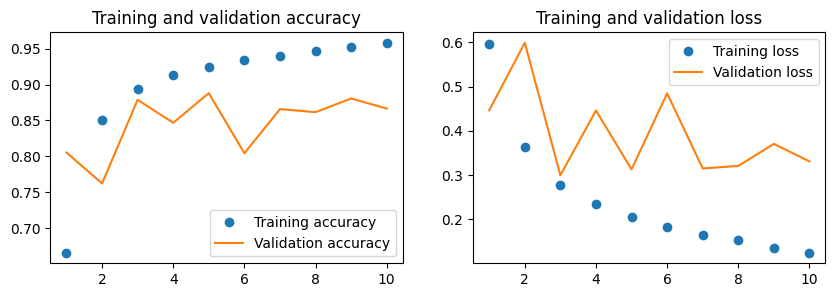

In [5]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

epochs = range(1, len(acc) + 1)
ax1.plot(epochs, acc, 'o', label='Training accuracy')
ax1.plot(epochs, val_acc, label='Validation accuracy')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'o', label='Training loss')
ax2.plot(epochs, val_loss, label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()